In [3]:
#from tqmd import tqmd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ParameterGrid


np.set_printoptions(precision=5, suppress=True)

# Zpracování dat

In [4]:
df = pd.read_table("data.csv", sep = ",")
display(df)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2714,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2715,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2716,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
print("SHAPE")
display(df.shape)
print("INFO")
display(df.info())
# print("DESCRIBE")
# display(df.describe())
print("N UNIQUE")
display(df.nunique())
print("DATA TYPES")
display(df.dtypes)

SHAPE


(2718, 22)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio          

None

N UNIQUE


Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     423
infant deaths                       195
Alcohol                            1055
percentage expenditure             2185
Hepatitis B                          87
Measles                             909
BMI                                 600
under-five deaths                   239
Polio                                73
Total expenditure                   792
Diphtheria                           81
HIV/AIDS                            197
GDP                                2317
Population                         2110
thinness  1-19 years                194
thinness 5-9 years                  200
Income composition of resources     613
Schooling                           173
dtype: int64

DATA TYPES


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Zobrazení hodnot nečíselných příznaků

In [6]:
display(df.Country.unique())
display(df.Status.unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

array(['Developing', 'Developed'], dtype=object)

Příznak Status je ze své podstaty ordinální, proto ho přetipuji pomocí vlastní kategorie. Naproti tomu by se en těžko hledala nějaká logická posloupnost v příznaku Country, roto použiji dummy příznaky.

In [7]:
status_category = pd.api.types.CategoricalDtype(categories=['Developing', 'Developed'], ordered=True)
df["Status"] = df["Status"].astype(status_category)
df["Status"] = df["Status"].cat.codes

df.select_dtypes(['object']).columns

Index(['Country'], dtype='object')

In [8]:
display(df["Status"].dtypes)
df.Status

dtype('int8')

0       0
1       0
2       0
3       0
4       0
       ..
2713    0
2714    0
2715    0
2716    0
2717    0
Name: Status, Length: 2718, dtype: int8

In [9]:
dummies = pd.get_dummies(df.Country)
dummies

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
#Převedu dummies z booleanu na čísla, kvůli ručnímu výpočtu w_hat pomocí pseudoinverze.
dummies = dummies.select_dtypes(['bool']).astype('category').apply(lambda x: x.cat.codes)
dummies

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df = df.join(dummies)
df = df.drop('Country', axis = 1)

In [12]:
df.shape #204 místo 22 přízanků, odpovídá nahrazení příznaku Country 183 unikátními dummy příznaky

(2718, 204)

Metodu vypořádání se s chybějícími hodnotami jsem zvolil nahrazení -1.

In [13]:
df = df.replace(np.nan, -1)

In [14]:
df.isnull().sum()

Year                                  0
Status                                0
Life expectancy                       0
Adult Mortality                       0
infant deaths                         0
                                     ..
Venezuela (Bolivarian Republic of)    0
Viet Nam                              0
Yemen                                 0
Zambia                                0
Zimbabwe                              0
Length: 204, dtype: int64

## Rozdělení dat
Data rozdělím na trénovací, validační a testovací množinu v poměru 50:25:25.

In [15]:
Xdata = df.drop("Life expectancy", axis = 1)
ydata = df["Life expectancy"]

In [16]:
print(ydata.min())
ydata.max()

36.3


89.0

In [17]:
rd_seed = 987


Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.5, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(1359, 203)

(1359,)

(1359, 203)

(1359,)

In [18]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(679, 203)

(679,)

(680, 203)

(680,)

# Trénink modelů

## Vlastní implementace náhodného lesa

In [35]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators = 10, max_samples=1, max_depth=10,min_samples_leaf=1, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        
        self.n_estimators = n_estimators
        self.max_samples = max_samples 
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf #přidáno na základě zkušenosti s DecisionTreeRegressor viz. níže
        self.trees = []
        
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth,min_samples_leaf=self.min_samples_leaf)
            
            samples = X.join(y).sample(n=int(X.shape[0]*self.max_samples))
            
            Xsamples = samples.drop("Life expectancy", axis = 1)
            ysamples = samples["Life expectancy"]
            
            tree.fit(Xsamples, ysamples)
            self.trees.append(tree)

            
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        preds = []
        for tree in self.trees:
            preds = np.array([tree.predict(X) for tree in self.trees])
            preds = np.swapaxes(preds, 0, 1)
            for j in range(0,len(ypredicted)-1):
                ypredicted[j] = np.average(preds[j])
                
        return ypredicted


In [22]:
display(int(Xtrain.shape[0]*0.5))
samples = Xtrain.join(ytrain).sample(n=Xtrain.shape[0])
display(samples)
samples2 = Xtrain.join(ytrain).sample(n=Xtrain.shape[0])
display(samples2)

679

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Life expectancy
261,2008,0,278.0,25,1.28,7.615430,75.0,928,22.0,39,...,0,0,0,0,0,0,0,0,0,57.6
1355,2002,0,17.0,1,1.98,70.132078,77.0,36,59.1,1,...,0,0,0,0,0,0,0,0,0,73.2
760,2005,0,213.0,3,2.77,440.602704,89.0,0,49.4,3,...,0,0,0,0,0,0,0,0,0,71.0
969,2002,0,176.0,0,10.71,513.346541,98.0,0,38.8,0,...,0,0,0,0,0,0,0,0,0,79.0
2503,2012,0,339.0,73,0.01,92.886979,78.0,2027,17.2,109,...,0,0,0,0,0,0,0,0,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,2012,0,133.0,2,0.01,0.000000,98.0,320,61.8,2,...,0,0,0,0,0,0,0,0,0,72.9
1530,2007,0,219.0,8,0.02,7.354001,74.0,11,25.5,12,...,0,0,0,0,0,0,0,0,0,61.2
1460,2013,0,128.0,3,0.53,110.677971,96.0,195,38.5,4,...,0,0,0,0,0,0,0,0,0,74.6
2047,2014,0,191.0,0,0.01,225.730775,95.0,0,3.1,0,...,0,0,0,0,0,0,0,0,0,67.3


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Life expectancy
1905,2012,0,72.0,0,1.13,5163.329180,93.0,160,67.0,0,...,0,0,0,0,0,0,0,0,0,77.8
143,2000,1,96.0,0,13.20,3557.455507,33.0,0,5.1,0,...,0,0,0,0,0,0,0,0,0,78.1
248,2005,0,191.0,0,6.25,365.799896,96.0,0,43.8,0,...,0,0,0,0,0,0,0,0,0,69.0
1284,2009,0,87.0,1,0.10,3001.628237,99.0,0,67.9,1,...,0,0,0,0,0,0,0,0,0,73.9
2677,2008,0,238.0,37,0.04,0.000000,78.0,7,35.7,47,...,0,0,0,0,0,0,1,0,0,63.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2000,0,224.0,0,4.29,268.183797,-1.0,0,47.6,0,...,0,0,0,0,0,0,0,0,0,67.4
1433,2004,1,92.0,0,12.42,12372.051880,94.0,0,56.4,0,...,0,0,0,0,0,0,0,0,0,78.7
2578,2011,1,16.0,25,8.67,0.000000,91.0,220,67.5,29,...,1,0,0,0,0,0,0,0,0,78.7
2097,2012,0,126.0,1,9.38,742.510971,97.0,0,58.3,1,...,0,0,0,0,0,0,0,0,0,74.9


### Optimalizace hyperparametrů

In [23]:
# param_grid = {
#     'max_depth': range(1,5),
#     "n_estimators": range(1,11),
# }
# param_comb = ParameterGrid(param_grid)

# RMSE_val_Forrest = []
# RMSE_train_Forrest = []
# for params in param_comb:
#     clf_forrest_screen = CustomRandomForest(max_depth=params['max_depth'], n_estimators=params["n_estimators"],max_samples = 1, random_state=rd_seed)
#     clf_forrest_screen.fit(Xtrain, ytrain)
#     RMSE_train_Forrest.append(mean_squared_error(ytrain, clf_forrest_screen.predict(Xtrain), squared = False))
#     RMSE_val_Forrest.append(mean_squared_error(yval, clf_forrest_screen.predict(Xval), squared = False))

# plt.figure(figsize=(20,6))
# plt.plot(RMSE_train_Forrest,'or-')
# plt.plot(RMSE_val_Forrest,'ob-')
# plt.xlabel('hyperparametr index')
# plt.ylabel('RMSE')
# plt.legend(['train', 'validation'])

# optimum_index = np.argmin(RMSE_val_Forrest)
# print(f'Best parameters: {param_comb[optimum_index]},train RMSE: {RMSE_train_Forrest[optimum_index]}, val RMSE: {RMSE_val_Forrest[optimum_index]}')

In [24]:
# ### Víc náhody

# param_grid = {
#     'max_depth': range(1,5),
#     "n_estimators": range(5,15),
#     "max_samples":[x / 10.0 for x in range(1, 10)]
# }
# param_comb = ParameterGrid(param_grid)

# RMSE_val_Forrest = []
# RMSE_train_Forrest = []
# for params in param_comb:
#     clf_forrest_screen = CustomRandomForest(max_depth=params['max_depth'], n_estimators=params["n_estimators"],max_samples = 0.5, random_state=rd_seed)
#     clf_forrest_screen.fit(Xtrain, ytrain)
#     RMSE_train_Forrest.append(mean_squared_error(ytrain, clf_forrest_screen.predict(Xtrain), squared = False))
#     RMSE_val_Forrest.append(mean_squared_error(yval, clf_forrest_screen.predict(Xval), squared = False))

# plt.figure(figsize=(20,6))
# plt.plot(RMSE_train_Forrest,'or-')
# plt.plot(RMSE_val_Forrest,'ob-')
# plt.xlabel('hyperparametr index')
# plt.ylabel('RMSE')
# plt.legend(['train', 'validation'])

# optimum_index = np.argmin(RMSE_val_Forrest)
# print(f'Best parameters: {param_comb[optimum_index]},train RMSE: {RMSE_train_Forrest[optimum_index]}, val RMSE: {RMSE_val_Forrest[optimum_index]}')

Best parameters: {'n_estimators': 14, 'max_samples': 0.6, 'max_depth': 12},train RMSE: 2.130475779362139, val RMSE: 3.430716143179628


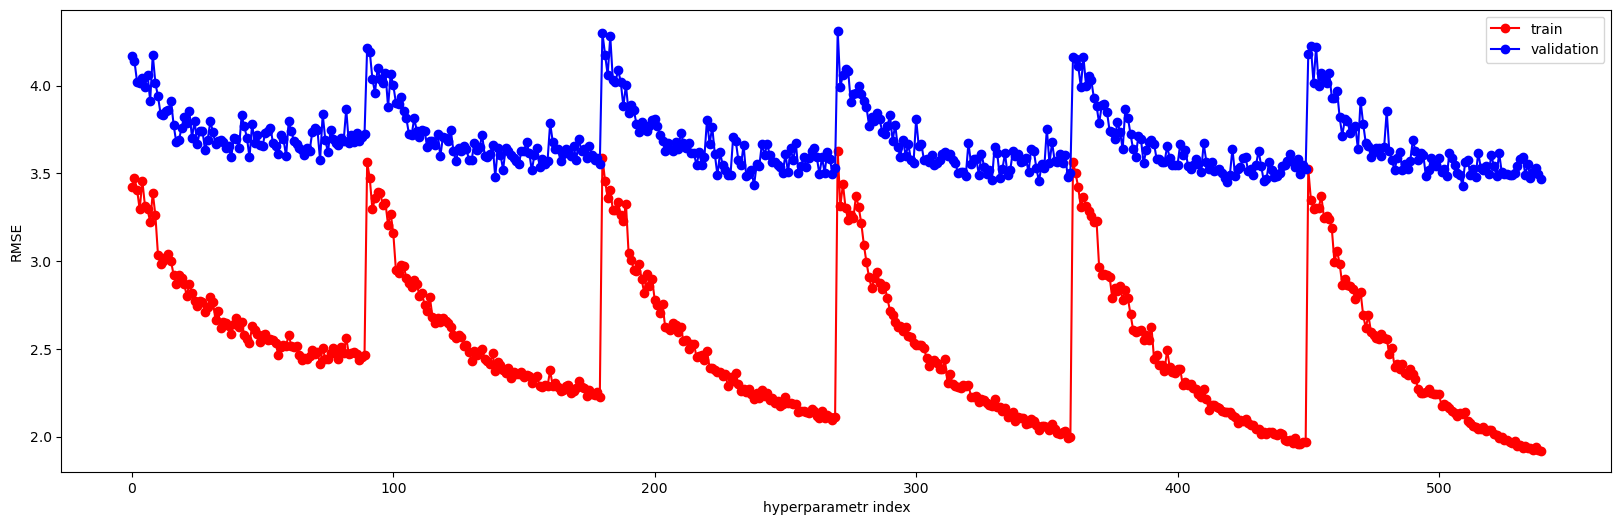

In [25]:
### Víc náhody (to jsem poplet a nezapnul), více hloubek

param_grid = {
    'max_depth': range(7,13),
    "n_estimators": range(5,15),
    "max_samples":[x / 10.0 for x in range(1, 10)]
}

param_comb = ParameterGrid(param_grid)

RMSE_val_Forrest = []
RMSE_train_Forrest = []
for params in param_comb:
    clf_forrest_screen = CustomRandomForest(max_depth=params['max_depth'], n_estimators=params["n_estimators"],max_samples = params["max_samples"], random_state=rd_seed)
    clf_forrest_screen.fit(Xtrain, ytrain)
    RMSE_train_Forrest.append(mean_squared_error(ytrain, clf_forrest_screen.predict(Xtrain), squared = False))
    RMSE_val_Forrest.append(mean_squared_error(yval, clf_forrest_screen.predict(Xval), squared = False))

plt.figure(figsize=(20,6))
plt.plot(RMSE_train_Forrest,'or-')
plt.plot(RMSE_val_Forrest,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])

optimum_index = np.argmin(RMSE_val_Forrest)
print(f'Best parameters: {param_comb[optimum_index]},train RMSE: {RMSE_train_Forrest[optimum_index]}, val RMSE: {RMSE_val_Forrest[optimum_index]}')

Best parameters: {'n_estimators': 14, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_depth': 9},train RMSE: 2.253667116639656, val RMSE: 3.4504589979927673


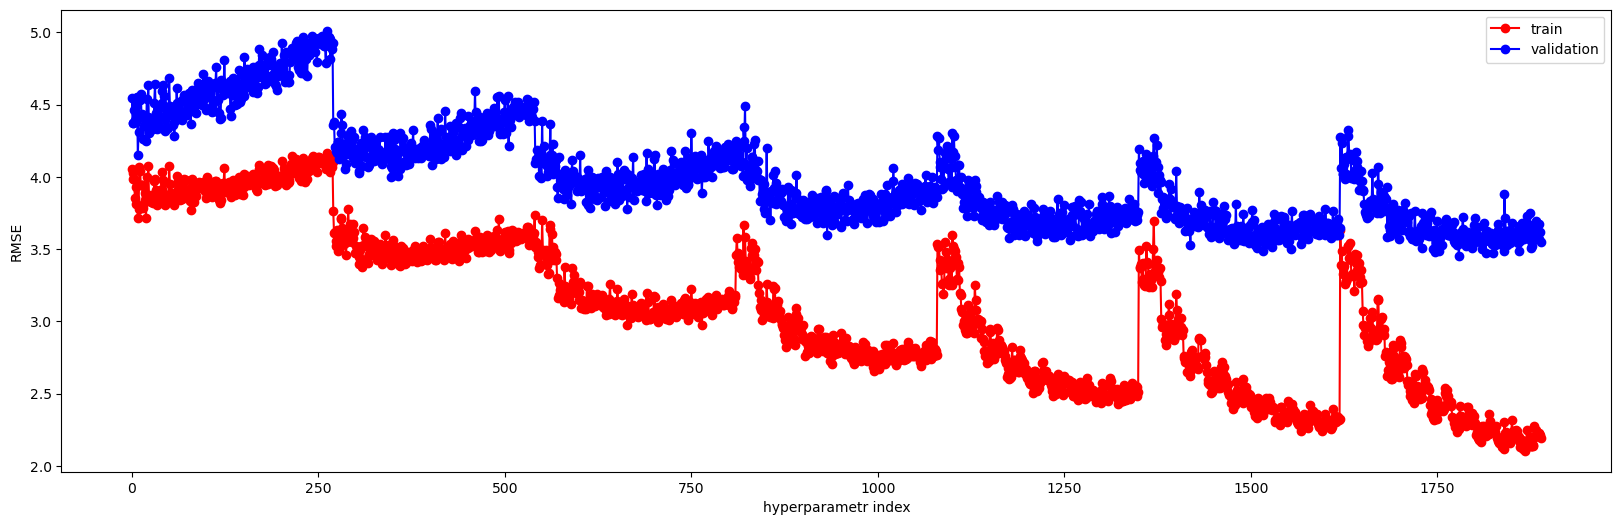

In [26]:
### Víc náhody, více hloubek, omezení velikosti listu

param_grid = {
    'max_depth': range(3,10),
    "n_estimators": range(5,15),
    "max_samples": [x / 10.0 for x in range(1, 10)],
    "min_samples_leaf": range(1,4),
}

param_comb = ParameterGrid(param_grid)

RMSE_val_Forrest = []
RMSE_train_Forrest = []
for params in param_comb:
    clf_forrest_screen = CustomRandomForest(max_depth=params['max_depth'],
                                            n_estimators=params["n_estimators"],
                                            max_samples = params["max_samples"],
                                            min_samples_leaf=params["min_samples_leaf"],
                                            random_state=rd_seed,
                                           )
    clf_forrest_screen.fit(Xtrain, ytrain)
    RMSE_train_Forrest.append(mean_squared_error(ytrain, clf_forrest_screen.predict(Xtrain), squared = False))
    RMSE_val_Forrest.append(mean_squared_error(yval, clf_forrest_screen.predict(Xval), squared = False))

plt.figure(figsize=(20,6))
plt.plot(RMSE_train_Forrest,'or-')
plt.plot(RMSE_val_Forrest,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])

optimum_index = np.argmin(RMSE_val_Forrest)
print(f'Best parameters: {param_comb[optimum_index]},train RMSE: {RMSE_train_Forrest[optimum_index]}, val RMSE: {RMSE_val_Forrest[optimum_index]}')

V lazení pokračovat nebudu, protože je velice nepravděpodobné, že by některý z náhodných lesů překonal hřebenovou regresi (RMSE = 2,15). Za nejlepší sadu hyperparametrů pro náhodný les beru {'n_estimators': 14, 'max_samples': 0.6, 'max_depth': 12}.

### Vyhodnocení modelu

In [36]:
clf_Forrest = CustomRandomForest(n_estimators=14, max_samples=0.6, max_depth=12)
clf_Forrest.fit(Xtrain, ytrain)

RMSE_Forrest = mean_squared_error(yval, clf_Forrest.predict(Xval), squared = False)
MAE_Forrest = mean_absolute_error(yval, clf_Forrest.predict(Xval))

print(f"RMSE Forrest: {RMSE_Forrest:.4f}, MAE Forrest: {MAE_Forrest:.4f}")

RMSE Forrest: 3.4817, MAE Forrest: 1.5184


## Hřebenová regrese
Jelikož hřebenová reegrese omezuje velikost vektoru koeficientů, je třeba data standardizovat, aby nebyli některé příznaky zvýhodněny čistě svým rozsahem.

In [19]:
scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

Hledání optimální hodnoty parametru alpha.

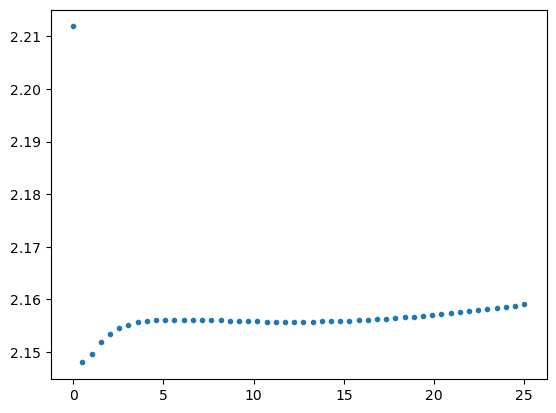

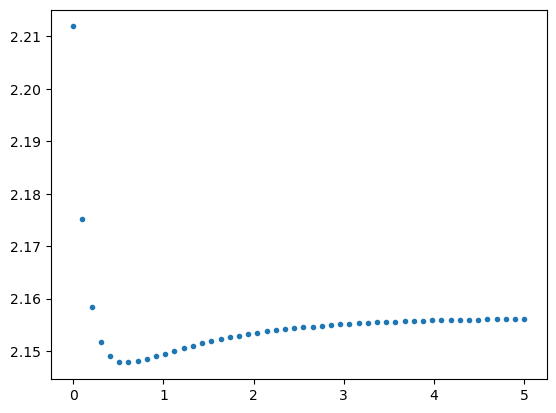

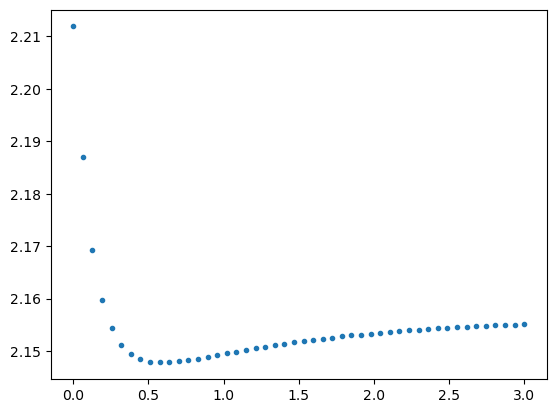

In [20]:
# alphas = np.linspace(0,200, 100) Ukázalo se že optimální hodnota parametru alpha leží v intervalu (0; 25)
alphas = np.linspace(0, 25, 50)

RMSE_val_ridge = []

for alpha in alphas:
    clf_Ridge = Ridge(alpha = alpha)
    clf_Ridge.fit(Xtrain_scaled, ytrain)
    RMSE_val_ridge.append(mean_squared_error(yval, clf_Ridge.predict(Xval_scaled), squared = False))
    
plt.plot(alphas, RMSE_val_ridge, '.')
plt.show()

alphas2 = np.linspace(0,5, 50)

RMSE_val_ridge2 = []

for alpha in alphas2:
    clf_Ridge = Ridge(alpha = alpha)
    clf_Ridge.fit(Xtrain_scaled, ytrain)
    RMSE_val_ridge2.append(mean_squared_error(yval, clf_Ridge.predict(Xval_scaled), squared = False))
    
plt.plot(alphas2, RMSE_val_ridge2, '.')
plt.show()

alphas3 = np.linspace(0,3,48)

RMSE_val_ridge3 = []

for alpha in alphas3:
    clf_Ridge = Ridge(alpha = alpha)
    clf_Ridge.fit(Xtrain_scaled, ytrain)
    RMSE_val_ridge3.append(mean_squared_error(yval, clf_Ridge.predict(Xval_scaled), squared = False))
    
plt.plot(alphas3, RMSE_val_ridge3, '.')
plt.show()

In [21]:
opt_alpha = np.argmin(RMSE_val_ridge3)
print(f'Optimal alpha: {alphas3[opt_alpha]:.4f}, val RMSE:{RMSE_val_ridge3[opt_alpha]:.4f}')

Optimal alpha: 0.5745, val RMSE:2.1478


In [22]:
alpha_final = alphas3[opt_alpha]
alpha_final

0.5744680851063829

### Vyhodnocení modelu
Trénování modelu s optimálním parametrem alpha = 0.5745.

In [23]:
clf_Ridge = Ridge(alpha = alphas3[opt_alpha])
clf_Ridge.fit(Xtrain_scaled, ytrain)

RMSE_Ridge = mean_squared_error(yval, clf_Ridge.predict(Xval_scaled), squared = False)
MAE_Ridge = mean_absolute_error(yval, clf_Ridge.predict(Xval_scaled))

print(f"RMSE Ridge: {RMSE_Ridge:.4f}, MAE Ridge: {MAE_Ridge:.4f}")
print(f"intercept:{clf_Ridge.intercept_:.4f}")
print(f"koeficienty:{clf_Ridge.coef_.flatten()}")

RMSE Ridge: 2.1478, MAE Ridge: 1.2967
intercept:68.9968
koeficienty:[ 0.95499  2.1153  -0.13883  3.02326 -0.33857  0.30389  0.34614 -0.1599
 -0.15963 -4.47002  0.04354  0.05937  0.07942 -1.83471 -0.13435  0.09801
  0.20411  0.13725 -0.00427  0.57931 -1.01658  0.45812  0.27082 -1.44269
  0.3836   0.47774  0.33626  0.53795  0.4492   0.12877  0.46187  0.45168
  0.1085   0.40874  0.05467  0.33257  0.0295  -0.73895 -0.27416 -0.16473
  0.44455 -0.55531  0.33409  0.59957 -0.05999 -0.83638 -0.9478   0.17341
 -0.41747 -0.83224  0.93371 -1.23867 -1.25611  0.71217  0.62836  0.27959
 -0.60699 -0.36314  0.85848  0.14458  0.5703   0.42994  0.25508 -1.30008
  0.13259 -0.53005  0.2828  -0.55013  0.23493  0.32413  0.18739  0.14769
 -0.94211 -0.66368  0.38838 -0.36992 -0.07299  0.73488  0.90721 -0.28614
 -0.68744  0.39022  0.56635 -0.59475  0.75749  0.37753  0.24671 -0.96576
 -0.75929 -0.15525 -0.37243  0.30217  0.00251  0.57394  0.75359  0.00329
  0.30691  0.12973  0.40176  0.95291  0.44173  0.46378  0

## Model rozhodovacího stromu
Jako třetí model jsem zvolil Regresní variantu rozhodovacího stromu, protože mě zajímalo jeho porovnání s náhodným lesem.

Rozhodovací strom sice nutně nevyžaduje standardicai příznaku. Nicméně když už existují, otestuji obě varianty. 

In [24]:
def optimal_tree(data_train, data_val):
    param_grid = {     
        'max_depth': range(1,30), 
        'criterion': ["squared_error", "absolute_error"]
    }
    param_comb = ParameterGrid(param_grid)

    RMSE_val_Tree = []
    RMSE_train_Tree = []
    for params in param_comb:
        clf_tree_screen = DecisionTreeRegressor(max_depth=params['max_depth'], criterion=params['criterion'], random_state=rd_seed)
        clf_tree_screen.fit(data_train, ytrain)
        RMSE_train_Tree.append(mean_squared_error(ytrain, clf_tree_screen.predict(data_train), squared = False))
        RMSE_val_Tree.append(mean_squared_error(yval, clf_tree_screen.predict(data_val), squared = False))
        
    # plt.figure(figsize=(20,6))
    # plt.plot(RMSE_val_Tree,'ob-')
    # plt.xlabel('hyperparametr index')
    # plt.ylabel('val RMSE')
    
    plt.figure(figsize=(20,6))
    plt.plot(RMSE_train_Tree,'or-')
    plt.plot(RMSE_val_Tree,'ob-')
    plt.xlabel('hyperparametr index')
    plt.ylabel('RMSE')
    plt.legend(['train', 'validation'])
    
    optimum_index = np.argmin(RMSE_val_Tree)
    print(f'Best parameters: {param_comb[optimum_index]}, val RMSE: {RMSE_val_Tree[optimum_index]}')

Best parameters: {'max_depth': 11, 'criterion': 'absolute_error'}, val RMSE: 2.7636240374414185


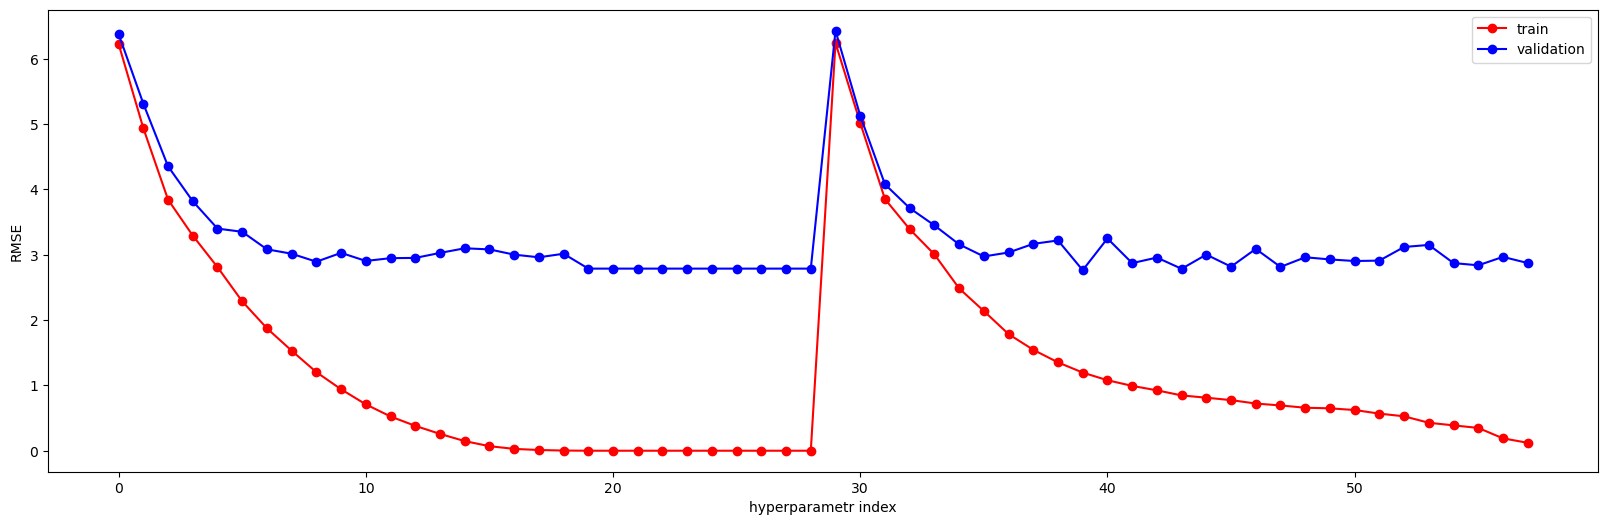

In [25]:
optimal_tree(Xtrain, Xval)

Best parameters: {'max_depth': 11, 'criterion': 'absolute_error'}, val RMSE: 2.7741926873009257


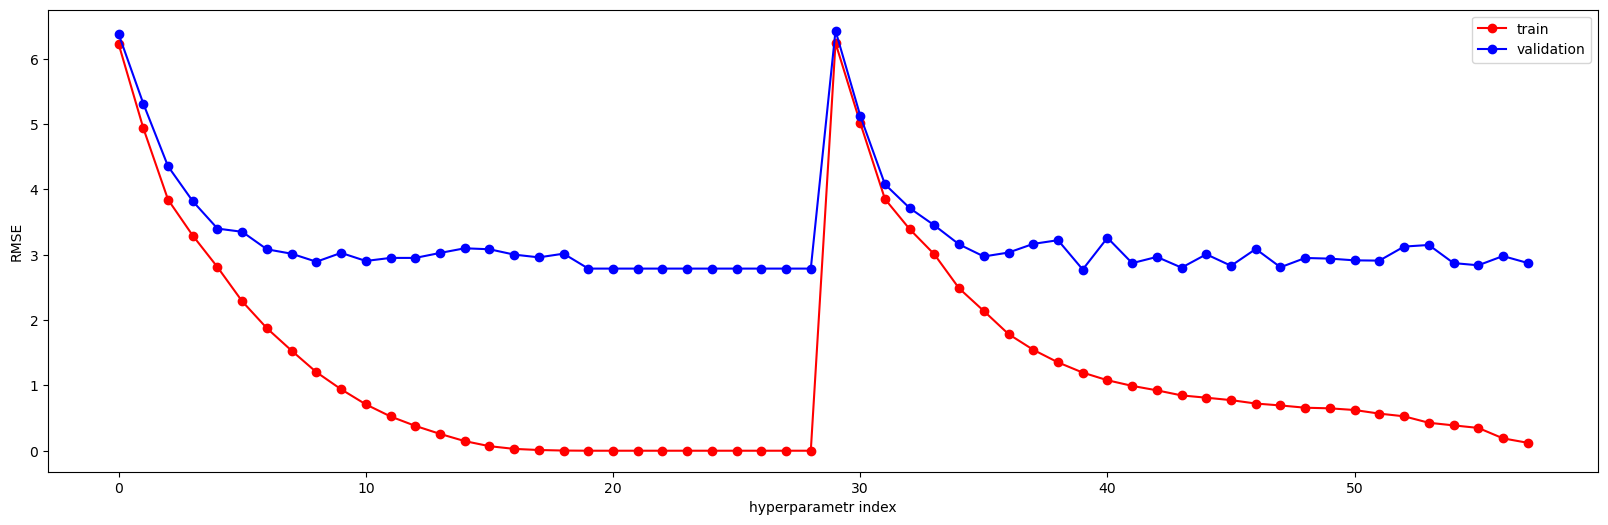

In [26]:
optimal_tree(Xtrain_scaled, Xval_scaled)

Závěrem tedy je, že přeškálování příznaků má malý význam. Navíc negativní. Dále je vydět, že při použití absolutní chyby, jako rozhodovacího krtitéria, je validasční RMSE více rozkolísané. Proto zkusím nalézt optimum pro sumu čtverců jako rozhodovacího kritéria.

Best depth: 20,train RMSE: 0.0, val RMSE: 2.7881640223651107


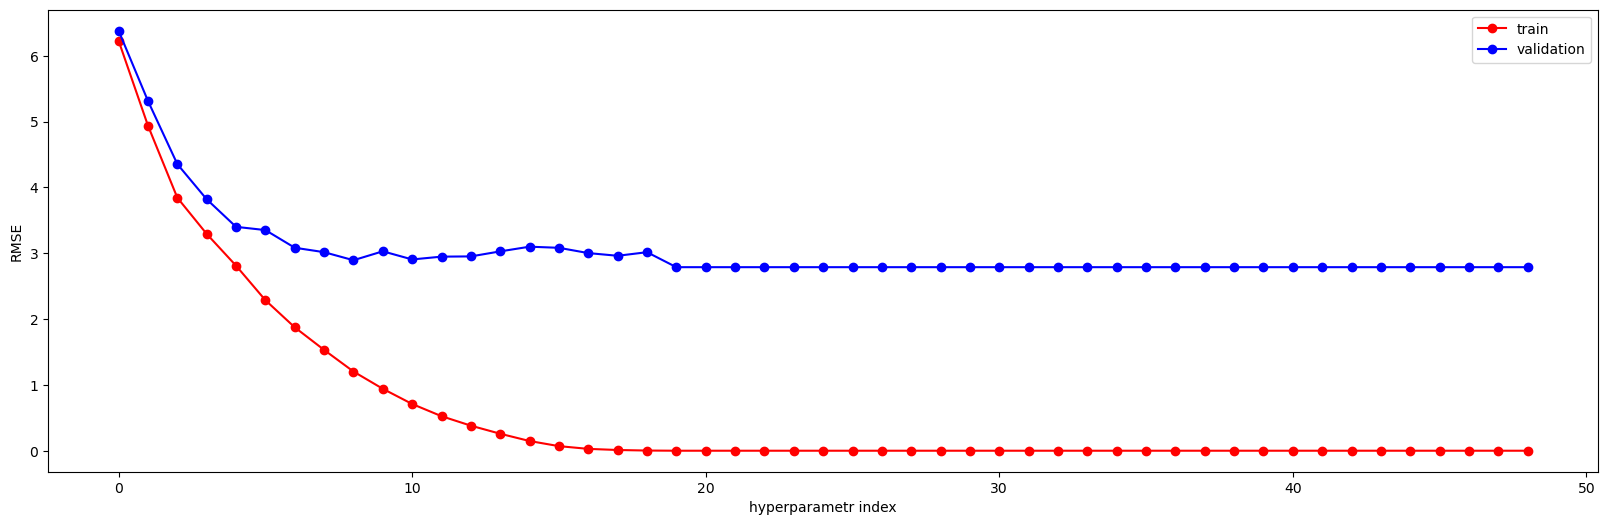

In [27]:
RMSE_val_Tree = []
RMSE_train_Tree = []

for depth in range(1,50):
    clf_tree_screen = DecisionTreeRegressor(max_depth=depth, criterion="squared_error", random_state=rd_seed)
    clf_tree_screen.fit(Xtrain, ytrain)
    RMSE_train_Tree.append(mean_squared_error(ytrain, clf_tree_screen.predict(Xtrain), squared = False))
    RMSE_val_Tree.append(mean_squared_error(yval, clf_tree_screen.predict(Xval), squared = False))
    
plt.figure(figsize=(20,6))
plt.plot(RMSE_train_Tree,'or-')
plt.plot(RMSE_val_Tree,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])

optimum_index = np.argmin(RMSE_val_Tree)
print(f'Best depth: {optimum_index+1},train RMSE: {RMSE_train_Tree[optimum_index]}, val RMSE: {RMSE_val_Tree[optimum_index]}')

RMSE se navýšilo o 2 setiny, což je nepatrné zhoršení v kontextu predikovaná proměnné, která je v desítkách let. Dále je vidět, že od získané otimální hloubky nastává stagnace, zároveň trénovací RMSE je rovno nule. Nejspíš, tak dochází k přeučení. Zkosím to zregulovat omezením minimální velikosti listu.

Best depth: 10,train RMSE: 1.2551961229067699, val RMSE: 2.6957228868979715


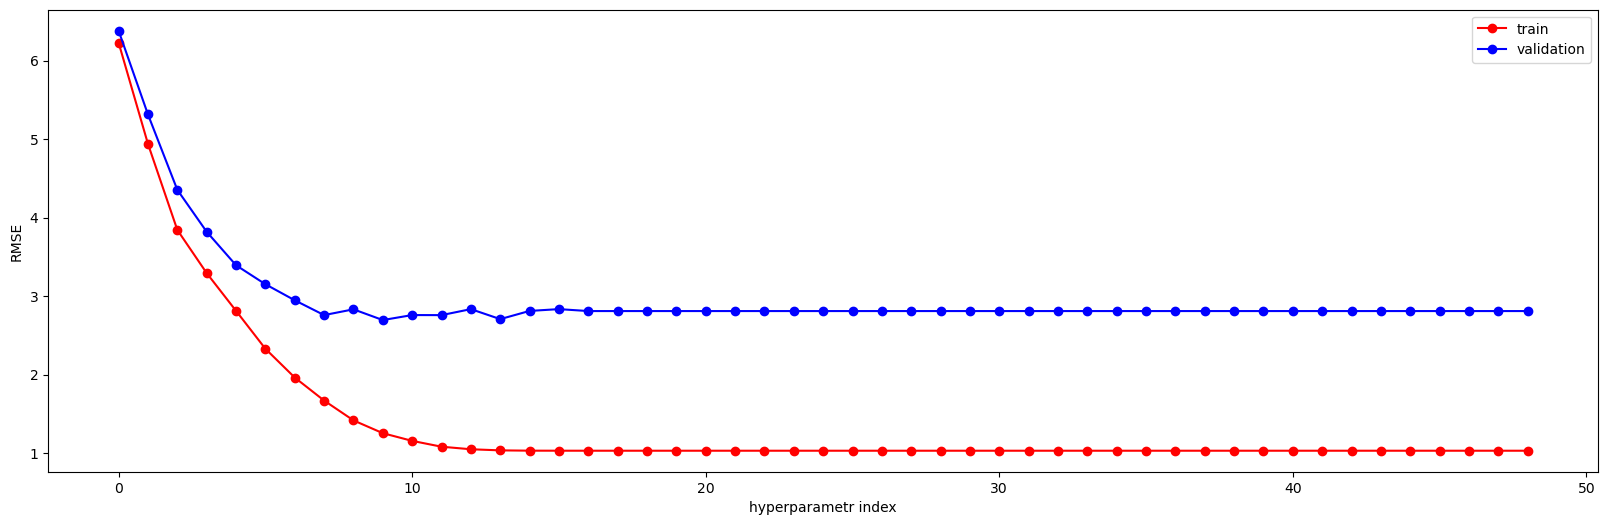

In [28]:
RMSE_val_Tree = []
RMSE_train_Tree = []

for depth in range(1,50):
    clf_tree_screen = DecisionTreeRegressor(max_depth=depth, criterion="squared_error", random_state=rd_seed, min_samples_leaf=3)
    clf_tree_screen.fit(Xtrain, ytrain)
    RMSE_train_Tree.append(mean_squared_error(ytrain, clf_tree_screen.predict(Xtrain), squared = False))
    RMSE_val_Tree.append(mean_squared_error(yval, clf_tree_screen.predict(Xval), squared = False))
    
plt.figure(figsize=(20,6))
plt.plot(RMSE_train_Tree,'or-')
plt.plot(RMSE_val_Tree,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])

optimum_index = np.argmin(RMSE_val_Tree)
print(f'Best depth: {optimum_index+1},train RMSE: {RMSE_train_Tree[optimum_index]}, val RMSE: {RMSE_val_Tree[optimum_index]}')

To pomohlo, zkusím tedy projet nějaký rozumný interval minimálních velikostí listu.

In [29]:
#Tohle nějak nefungovalo, tak jsem to udělal ručně.

# param_grid = {     
#         'max_depth': range(1,30), 
#         'leaf': [2,3,4,5,6,7,8,9,10],
#     }
# param_comb = ParameterGrid(param_grid)

# RMSE_val_Tree = []
# RMSE_train_Tree = []
# for params in param_comb:
#     clf_tree_screen = DecisionTreeRegressor(max_depth=params['max_depth'], min_samples_leaf=['leaf'], random_state=rd_seed)
#     clf_tree_screen.fit(Xtrain, ytrain)
#     RMSE_train_Tree.append(mean_squared_error(ytrain, clf_tree_screen.predict(Xtrain), squared = False))
#     RMSE_val_Tree.append(mean_squared_error(yval, clf_tree_screen.predict(Xval), squared = False))
    
# plt.figure(figsize=(20,6))
# plt.plot(RMSE_train_Tree,'or-')
# plt.plot(RMSE_val_Tree,'ob-')
# plt.xlabel('hyperparametr index')
# plt.ylabel('RMSE')
# plt.legend(['train', 'validation'])

# optimum_index = np.argmin(RMSE_val_Tree)
# print(f'Best parameters: {param_comb[optimum_index]}, val RMSE: {RMSE_val_Tree[optimum_index]}')

Best depth: 9,train RMSE: 1.256275140549926, val RMSE: 2.585945543081419


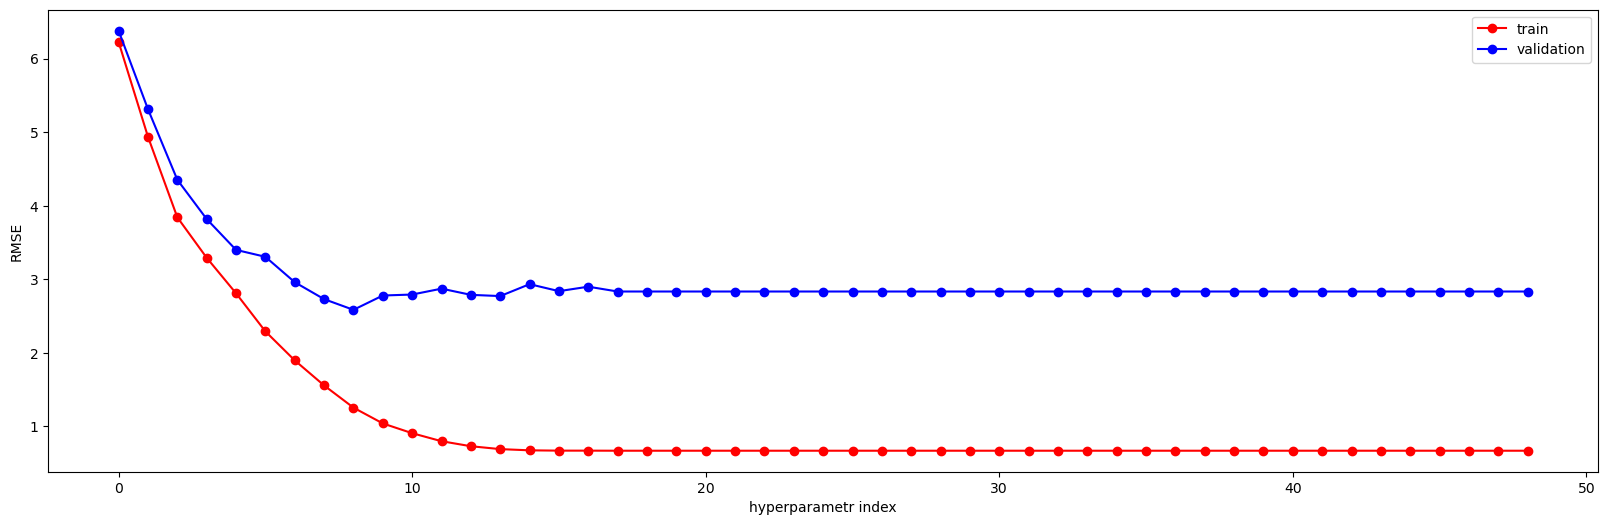

In [30]:
RMSE_val_Tree = []
RMSE_train_Tree = []

for depth in range(1,50):
    clf_tree_screen = DecisionTreeRegressor(max_depth=depth, criterion="squared_error", random_state=rd_seed, min_samples_leaf=2)
    clf_tree_screen.fit(Xtrain, ytrain)
    RMSE_train_Tree.append(mean_squared_error(ytrain, clf_tree_screen.predict(Xtrain), squared = False))
    RMSE_val_Tree.append(mean_squared_error(yval, clf_tree_screen.predict(Xval), squared = False))
    
plt.figure(figsize=(20,6))
plt.plot(RMSE_train_Tree,'or-')
plt.plot(RMSE_val_Tree,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])

optimum_index = np.argmin(RMSE_val_Tree)
print(f'Best depth: {optimum_index+1},train RMSE: {RMSE_train_Tree[optimum_index]}, val RMSE: {RMSE_val_Tree[optimum_index]}')

Best depth: 13,train RMSE: 1.2329821749361487, val RMSE: 2.712587710526887


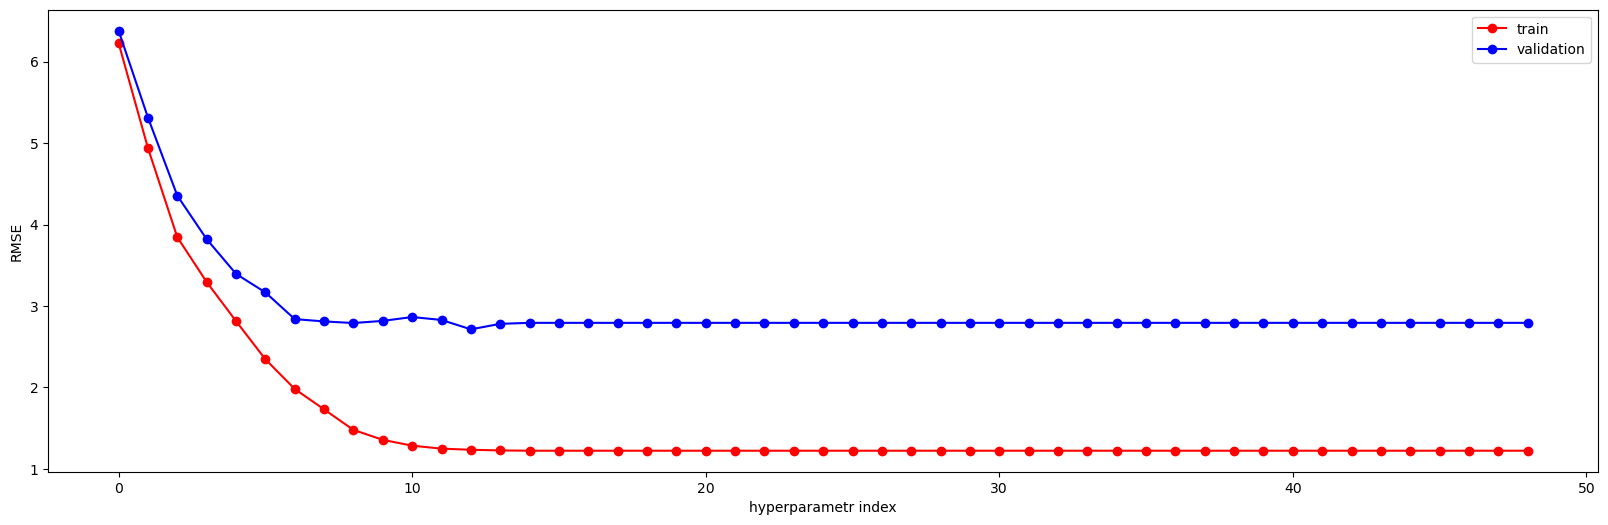

In [31]:
RMSE_val_Tree = []
RMSE_train_Tree = []

for depth in range(1,50):
    clf_tree_screen = DecisionTreeRegressor(max_depth=depth, criterion="squared_error", random_state=rd_seed, min_samples_leaf=4)
    clf_tree_screen.fit(Xtrain, ytrain)
    RMSE_train_Tree.append(mean_squared_error(ytrain, clf_tree_screen.predict(Xtrain), squared = False))
    RMSE_val_Tree.append(mean_squared_error(yval, clf_tree_screen.predict(Xval), squared = False))
    
plt.figure(figsize=(20,6))
plt.plot(RMSE_train_Tree,'or-')
plt.plot(RMSE_val_Tree,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])

optimum_index = np.argmin(RMSE_val_Tree)
print(f'Best depth: {optimum_index+1},train RMSE: {RMSE_train_Tree[optimum_index]}, val RMSE: {RMSE_val_Tree[optimum_index]}')

Zdá se, že optimální hodnota parametru minimální velikosti listu je dvě. Pro větší hodnoty už RMSE jen stoupalo.

### Vyhodnocení modelu

In [32]:
clf_best_tree = DecisionTreeRegressor(max_depth=9, criterion="squared_error", random_state=rd_seed, min_samples_leaf=2)
clf_best_tree.fit(Xtrain, ytrain)

RMSE_Tree = mean_squared_error(yval, clf_best_tree.predict(Xval), squared = False)
MAE_Tree = mean_absolute_error(yval, clf_best_tree.predict(Xval))

print(f"RMSE Tree: {RMSE_Tree:.4f}, MAE Tree: {MAE_Tree:.4f}")

RMSE Tree: 2.5859, MAE Tree: 1.6914


# Evaluace nejlepšího modelu a predikce výsledků
Podle evaluačního RMSE a MAE jsem vybral jako nejleší model hřebenovou regresi.

In [37]:
print(f"RMSE Forrest: {RMSE_Forrest:.4f}, MAE Forrest: {MAE_Forrest:.4f}")
print(f"RMSE Ridge: {RMSE_Ridge:.4f}, MAE Ridge: {MAE_Ridge:.4f}")
print(f"RMSE Tree: {RMSE_Tree:.4f}, MAE Tree: {MAE_Tree:.4f}")

RMSE Forrest: 3.4817, MAE Forrest: 1.5184
RMSE Ridge: 2.1478, MAE Ridge: 1.2967
RMSE Tree: 2.5859, MAE Tree: 1.6914


In [38]:
clf_best = Ridge(alpha = alphas3[opt_alpha])
clf_best.fit(Xtrain_scaled, ytrain)

Xtest_scaled = scaler.transform(Xtest)

RMSE_val = mean_squared_error(yval, clf_best.predict(Xval_scaled), squared = False)
MAE_val = mean_absolute_error(yval, clf_best.predict(Xval_scaled))
RMSE_test = mean_squared_error(ytest, clf_best.predict(Xtest_scaled), squared = False)
MAE_test = mean_absolute_error(ytest, clf_best.predict(Xtest_scaled))

print(f"RMSE val: {RMSE_val:.4f}, MAE val: {MAE_val:.4f}")
print(f"RMSE test: {RMSE_test:.4f}, MAE test: {MAE_test:.4f}")

RMSE val: 2.1478, MAE val: 1.2967
RMSE test: 2.0648, MAE test: 1.2842


## Zpracování evaluačních dat

In [39]:
df_eval = pd.read_table("evaluation.csv", sep = ",")
df_eval_freeze = pd.read_table("evaluation.csv", sep = ",")

display(df_eval)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Azerbaijan,2015,Developing,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,Azerbaijan,2014,Developing,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,Azerbaijan,2013,Developing,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,Azerbaijan,2012,Developing,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,Azerbaijan,2011,Developing,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,United Republic of Tanzania,2014,Developing,34.0,86,0.01,0.000000,97.0,88,23.2,...,97.0,5.58,97.0,1.4,NaN,NaN,6.8,6.6,NaN,NaN
206,United Republic of Tanzania,2013,Developing,323.0,86,4.20,0.000000,91.0,185,22.5,...,91.0,5.57,91.0,2.1,NaN,NaN,6.8,6.7,NaN,NaN
207,United Republic of Tanzania,2012,Developing,348.0,87,3.98,0.000000,92.0,1668,21.9,...,9.0,5.72,92.0,2.4,NaN,NaN,6.9,6.8,NaN,NaN
208,United Republic of Tanzania,2011,Developing,348.0,88,4.04,0.000000,9.0,1622,21.3,...,88.0,5.72,9.0,3.1,NaN,NaN,7.0,6.9,NaN,NaN


In [40]:
df_OG = pd.read_table("data.csv", sep = ",")
set(df_OG.columns) - set(df_eval.columns)

{'Life expectancy'}

In [41]:
display(df_eval_freeze.Country.unique())
display(df_OG.Country.unique())

array(['Azerbaijan', 'Belgium', 'Belize', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bulgaria', 'Canada',
       'Colombia', 'Czechia', 'Democratic Republic of the Congo',
       'El Salvador', 'Ethiopia', 'Fiji', 'Gambia', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Indonesia', 'Japan', 'Madagascar',
       'Malawi', 'Myanmar', 'Nepal', 'Niger', 'Norway', 'Paraguay',
       'Peru', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Sudan',
       'Swaziland', 'The former Yugoslav republic of Macedonia', 'Togo',
       'United Republic of Tanzania'], dtype=object)

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [42]:
print("SHAPE")
display(df_eval.shape)
print("INFO")
display(df_eval.info())
# print("DESCRIBE")
# display(df.describe())
print("N UNIQUE")
display(df_eval.nunique())
print("DATA TYPES")
display(df_eval.dtypes)

SHAPE


(210, 21)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          171 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      187 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              204 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            209 non-null    float64
 12  Total expenditure

None

N UNIQUE


Country                             35
Year                                 6
Status                               2
Adult Mortality                    149
infant deaths                       55
Alcohol                            118
percentage expenditure             139
Hepatitis B                         39
Measles                             98
BMI                                163
under-five deaths                   66
Polio                               39
Total expenditure                  158
Diphtheria                          38
HIV/AIDS                            44
GDP                                168
Population                         168
thinness  1-19 years                65
thinness 5-9 years                  66
Income composition of resources    167
Schooling                           76
dtype: int64

DATA TYPES


Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [43]:
df_eval["Status"] = df_eval["Status"].astype(status_category)
df_eval["Status"] = df_eval["Status"].cat.codes

dummies_eval = pd.get_dummies(df_eval.Country)
dummies_eval = dummies_eval.select_dtypes(['bool']).astype('category').apply(lambda x: x.cat.codes)

df_eval = df_eval.join(dummies_eval)
df_eval = df_eval.drop('Country', axis = 1)

df_eval = df_eval.replace(np.nan, -1)

display(df_eval)
display(df_eval.isnull().sum())
display(df_eval.dtypes)

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Paraguay,Peru,Slovakia,Slovenia,Solomon Islands,South Sudan,Swaziland,The former Yugoslav republic of Macedonia,Togo,United Republic of Tanzania
0,2015,0,118.0,5,-1.00,0.000000,96.0,0,52.5,6,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,119.0,5,0.01,306.182431,94.0,0,51.5,6,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,121.0,5,2.14,275.651493,93.0,164,5.6,6,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,123.0,5,0.01,285.610391,88.0,0,49.7,6,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,125.0,5,1.98,263.142699,84.0,0,48.8,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2014,0,34.0,86,0.01,0.000000,97.0,88,23.2,121,...,0,0,0,0,0,0,0,0,0,1
206,2013,0,323.0,86,4.20,0.000000,91.0,185,22.5,124,...,0,0,0,0,0,0,0,0,0,1
207,2012,0,348.0,87,3.98,0.000000,92.0,1668,21.9,126,...,0,0,0,0,0,0,0,0,0,1
208,2011,0,348.0,88,4.04,0.000000,9.0,1622,21.3,128,...,0,0,0,0,0,0,0,0,0,1


Year                                         0
Status                                       0
Adult Mortality                              0
infant deaths                                0
Alcohol                                      0
percentage expenditure                       0
Hepatitis B                                  0
Measles                                      0
BMI                                          0
under-five deaths                            0
Polio                                        0
Total expenditure                            0
Diphtheria                                   0
HIV/AIDS                                     0
GDP                                          0
Population                                   0
thinness  1-19 years                         0
thinness 5-9 years                           0
Income composition of resources              0
Schooling                                    0
Azerbaijan                                   0
Belgium      

Year                                           int64
Status                                          int8
Adult Mortality                              float64
infant deaths                                  int64
Alcohol                                      float64
percentage expenditure                       float64
Hepatitis B                                  float64
Measles                                        int64
BMI                                          float64
under-five deaths                              int64
Polio                                        float64
Total expenditure                            float64
Diphtheria                                   float64
HIV/AIDS                                     float64
GDP                                          float64
Population                                   float64
thinness  1-19 years                         float64
thinness 5-9 years                           float64
Income composition of resources              f

In [44]:
overlap = []
for name in df_OG.Country.unique():
    if name in df_eval_freeze.Country.unique():
        overlap.append(name)

display(overlap)
print(len(overlap)) #35 => všechny země byli v trénovacím datasetu
print(df_eval_freeze.Year.unique())

['Azerbaijan',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bulgaria',
 'Canada',
 'Colombia',
 'Czechia',
 'Democratic Republic of the Congo',
 'El Salvador',
 'Ethiopia',
 'Fiji',
 'Gambia',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Indonesia',
 'Japan',
 'Madagascar',
 'Malawi',
 'Myanmar',
 'Nepal',
 'Niger',
 'Norway',
 'Paraguay',
 'Peru',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'South Sudan',
 'Swaziland',
 'The former Yugoslav republic of Macedonia',
 'Togo',
 'United Republic of Tanzania']

35
[2015 2014 2013 2012 2011 2010]


Mezi staty v tréninkovém a evaluačním datasetu je překryv. V evaluaci je podskupina statu z tréninkového datasetu. Datové body v evaluačním datasetu jsou body pro určité roky, které pro vybrané státy chybí v tréninkovém datasetu. Nicméně u většiny států máme data v celé škále let 2000-2015. Proto dává smysl ponechat přízank rok. Zároveň je na menším intervalu porovnání mezi státy ve stejných letech (2000-2009), proto dává smysl ponechat i příznak státu samotného.

## Predikce

Protože v evaluační množině chybí některé státy. Nefungoval by scaler nafitovaný na trénovací množině. Jelikož jsou ale státy kódovány pomocí dummy příznaků, přidám k evaluační množině sloupce s chybějícími státy, které budou obsahovat pouze nuly. Tím fakticky dodám informaci o jaký stát se nejedná, která je implicitně daná původním příznakem Country.

In [45]:
missing_names = list(set(Xtrain.columns) - set(df_eval.columns))
missing_countries = pd.DataFrame(columns=missing_names, index = range(210))
missing_countries = missing_countries.replace(np.nan, 0)
display(missing_countries)

,Liberia,Netherlands,Cabo Verde,Comoros,Singapore,Antigua and Barbuda,Georgia,Nicaragua,Tonga,Turkmenistan,...,Germany,Mauritius,Philippines,Armenia,Lao People's Democratic Republic,Venezuela (Bolivarian Republic of),Thailand,Somalia,Saudi Arabia,Uganda
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_eval = df_eval.join(missing_countries)
df_eval = df_eval[Xtrain.columns]

In [47]:
df_eval_scaled = scaler.transform(df_eval)

In [48]:
y_eval_pred = clf_best.predict(df_eval_scaled)
y_eval_pred

array([73.69284, 73.41588, 73.31072, 72.86515, 72.42139, 71.66313,
       81.58675, 80.89108, 80.22902, 80.13317, 79.94408, 79.62257,
       72.04743, 71.4625 , 71.08319, 70.6949 , 70.31115, 70.21203,
       67.77994, 67.59525, 67.35818, 67.1254 , 66.90562, 66.78468,
       67.72093, 67.26803, 66.98255, 67.06217, 66.51525, 66.26257,
       75.32646, 74.27653, 74.17557, 73.98229, 73.80322, 73.11952,
       84.85797, 84.38027, 85.08798, 84.42329, 83.32734, 84.51843,
       75.46737, 74.03835, 74.73152, 74.66212, 74.07542, 74.05303,
       79.26378, 78.12278, 78.02793, 77.71105, 77.52456, 77.29353,
       59.09066, 57.40345, 57.01158, 56.53601, 54.49608, 55.84788,
       73.3084 , 73.09683, 72.86944, 72.6256 , 72.19024, 72.12216,
       61.63514, 61.58899, 60.93626, 60.44127, 59.84028, 59.7659 ,
       70.64084, 70.68194, 70.27722, 70.47963, 69.8209 , 69.58117,
       60.26541, 60.14165, 59.9719 , 59.8383 , 59.18522, 58.86317,
       74.08584, 73.58053, 73.5674 , 73.44842, 73.09452, 72.99

In [49]:
prediction = pd.DataFrame()

prediction.rename(columns={'': 'Country'}, inplace=True)
prediction["Country"] = df_eval_freeze["Country"]
prediction["Year"] = df_eval["Year"]
prediction["Life expectancy"] = y_eval_pred.tolist()

display(prediction)
display(prediction.columns)

,Country,Year,Life expectancy
0,Azerbaijan,2015,73.692841
1,Azerbaijan,2014,73.415877
2,Azerbaijan,2013,73.310725
3,Azerbaijan,2012,72.865151
4,Azerbaijan,2011,72.421385
...,...,...,...
205,United Republic of Tanzania,2014,60.813941
206,United Republic of Tanzania,2013,59.527876
207,United Republic of Tanzania,2012,59.022264
208,United Republic of Tanzania,2011,57.701430


Index(['Country', 'Year', 'Life expectancy'], dtype='object')

In [50]:
prediction.to_csv('results.csv')